In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fileList(path_before):
    fileList = os.listdir(path_before)
    names = []
    for file in fileList:
        names.append(file)
    names.sort()
    return names

good = []
bad  = []

for type in fileList("C:/Users/PC/Desktop/Carlos/MVTec_grid"):
   if type == "good":
       for name in fileList("C:/Users/PC/Desktop/Carlos/MVTec_grid/good"):
          good.append(plt.imread("C:/Users/PC/Desktop/Carlos/MVTec_grid/good/"+name))
   else:  
       for name in fileList("C:/Users/PC/Desktop/Carlos/MVTec_grid/"+type):
          bad.append(plt.imread("C:/Users/PC/Desktop/Carlos/MVTec_grid/"+type+"/"+name))
 
good = np.array(good)
bad  = np.array(bad)

In [2]:
print(good.shape)
print(bad.shape)

(264, 1024, 1024)
(57, 1024, 1024)


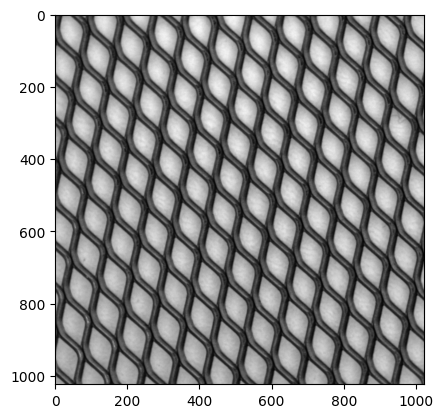

In [3]:
plt.imshow(good[0], cmap="gray")

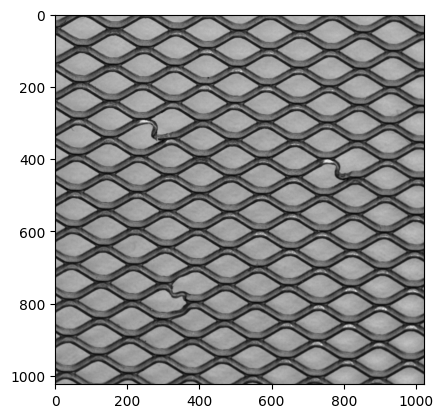

In [4]:
plt.imshow(bad[0], cmap="gray")

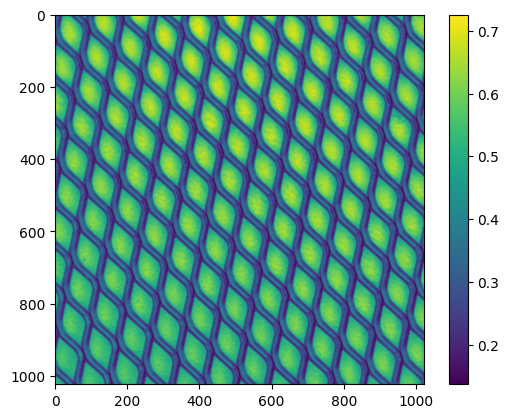

In [5]:
plt.figure()
plt.imshow(good[0])
plt.colorbar()
plt.grid(False)
plt.show()

#전처리가 되어있음 0~1 사이. 

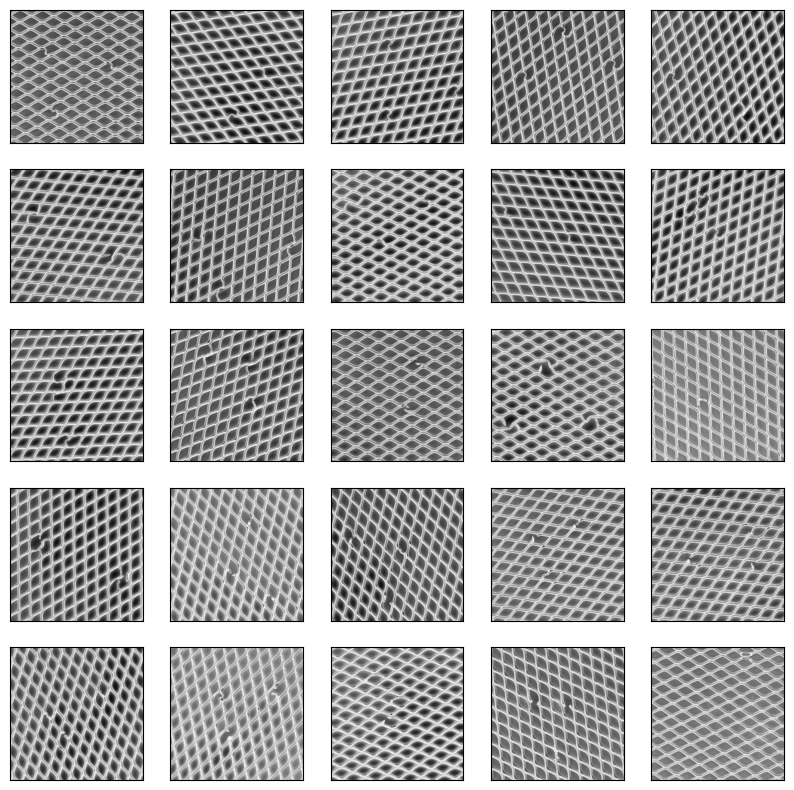

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(bad[i], cmap=plt.cm.binary) 
plt.show()

In [7]:
# from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from keras.models import Sequential
# from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# 레이블 생성 (good: 1, bad: 0)
goods = np.ones(len(good))
bads = np.zeros(len(bad))

# 데이터 병합
X = np.concatenate((good, bad), axis=0) 
y = np.concatenate((goods, bads), axis=0) #labels

# 데이터 정규화 (0~1 사이 값으로 스케일링)
#X = X / 255.0 #정규화 되있음으로 x 더안함. 

# 학습용과 테스트용 데이터로 분할  
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    shuffle= True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(256, 1024, 1024)
(65, 1024, 1024)
(256,)
(65,)


In [7]:
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.layers import Flatten, Dense

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(1024, 1024)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1048576)           0         
                                                                 
 dense (Dense)               (None, 128)               134217856 
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134,219,146
Trainable params: 134,219,146
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X_train, y_train, epochs=10, validation_split=0.2)
model.summary()

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [11]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(1024, 1024)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:Mul]

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_split=0.2)
model.summary()

In [ ]:

====================================================================================
====================================================================================

여기서부턴 교수님이랑 
====================================================================================
====================================================================================



In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fileList(path_before):
    fileList = os.listdir(path_before)
    names = []
    for file in fileList:
        names.append(file)
    names.sort()
    return names

#방법1 -> 한번에 합치기. 
# good = []
# bad  = []  

# for type in fileList("C:/Users/PC/Desktop/Carlos/MVTec_grid"):
#    if type == "good":
#        for name in fileList("C:/Users/PC/Desktop/Carlos/MVTec_grid/good"):
#           good.append(plt.imread("C:/Users/PC/Desktop/Carlos/MVTec_grid/good/"+name))
#    else:  
#        for name in fileList("C:/Users/PC/Desktop/Carlos/MVTec_grid/"+type):
#           bad.append(plt.imread("C:/Users/PC/Desktop/Carlos/MVTec_grid/"+type+"/"+name))


    
#방법2 -> 타입별로 분해하기
X = [] 
y = []
Type = []

for type in fileList("C:/Users/PC/Desktop/Carlos/MVTec_grid"): 
       for name in fileList("C:/Users/PC/Desktop/Carlos/MVTec_grid/"+type):
          image = plt.imread("C:/Users/PC/Desktop/Carlos/MVTec_grid/"+type+"/"+name)
 
          #업셈플링 (야매임. )   X2 해주는거임 bad 를
          image = cv2.resize(image, (300,300))
          if type !="good": 
              X.append(image) 
              y.append(int(type != "good"))  
              Type.append(type)
          #업셈플링  제대로 안될때 추가하기 
              
          X.append(cv2.resize(image, (300,300))) #사이즈가 커서 실행이 안되서 사이즈 줄임. 이거는 2의 제곱수 제약없음. 편한대로~ 
          y.append(int(type != "good")) # 0 , 1 로 보고싶으면 int(type !="good") 으로 하면됨.  good 0 , false 1
          Type.append(type) 
          

#방법 1          
# good = np.array(good)
# bad  = np.array(bad)

#방법 2 
X = np.array(X)
X = np.expand_dims(X, axis = -1) 
y  = np.array(y)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X, y , test_size=0.2 , stratify = Type ) 
#stratify는 골고루 넣어주는것 , 그래서 각 이미지의 타잎을 알려주면 됨.  -> 파일불러온다음에 타입을알려주고 나눠줌

print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(302, 300, 300, 1) (302,)
(76, 300, 300, 1) (76,)


In [4]:
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping


inputs = layers.Input(shape= (300,300,1 ))
x = layers.Conv2D(64, (5,5) , padding="same", strides = 2)(inputs)   
x = layers.MaxPooling2D((2,2),strides=2)(x)
#배치정규화 layer
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x) 
x = layers.Conv2D(128, (3,3) , padding="same", strides = 1)(x) 
x = layers.MaxPooling2D((2,2),strides=2)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

x = layers.Conv2D(128, (3,3) , padding="same", strides = 1)(x)
x = layers.MaxPooling2D((2,2),strides=2)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation("relu")(x)

#Header
x = layers.GlobalAveragePooling2D()(x) #바디에서 header로 가는 목부분
x = layers.Dense(128)(x)              #Dense(여기에 들어가는것은 64 보다 작으면됨) 
x = layers.BatchNormalization()(x) #header쪽에도 batchnormal 하고 activation 하면 성능면에서 좀더 좋음.
x = layers.Activation("relu")(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(64)(x)          
x = layers.BatchNormalization()(x) 
x = layers.Activation("relu")(x)
x = layers.Dropout(0.2)(x)

x = layers.Dense(64)(x)          
x = layers.BatchNormalization()(x) 
x = layers.Activation("relu")(x)
x = layers.Dropout(0.2)(x)

outputs = layers.Dense(1 ,activation = "sigmoid")(x)
model = Model(inputs = inputs , outputs = outputs)
model.compile(optimizer= "adam" , loss= "binary_crossentropy" , metrics=["acc"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 64)      1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 75, 75, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       73856 

In [5]:
es_callback = EarlyStopping(monitor="val_loss", patience = 10 , restore_best_weights = True)
history = model.fit( X_train , y_train , 
          batch_size = 32 ,
          epochs = 300 ,
          validation_split = 0.2 ,
          callbacks=[es_callback])    #만약안되면 사이즈 300, 300, 을 더 줄여보기 200, 200 으로 , 또는 batch_size를 줄여보기 .2 제곱승으로 

Epoch 1/300
8/8 [==============================] - 5s 297ms/step - loss: 0.9602 - acc: 0.4523 - val_loss: 0.6893 - val_acc: 0.6393
Epoch 2/300
8/8 [==============================] - 1s 85ms/step - loss: 0.7386 - acc: 0.5311 - val_loss: 0.6880 - val_acc: 0.6393
Epoch 3/300
8/8 [==============================] - 1s 84ms/step - loss: 0.6212 - acc: 0.6515 - val_loss: 0.6891 - val_acc: 0.6393
Epoch 4/300
8/8 [==============================] - 1s 84ms/step - loss: 0.5369 - acc: 0.7054 - val_loss: 0.7011 - val_acc: 0.3607
Epoch 5/300
8/8 [==============================] - 1s 84ms/step - loss: 0.4628 - acc: 0.7801 - val_loss: 0.7255 - val_acc: 0.3607
Epoch 6/300
8/8 [==============================] - 1s 84ms/step - loss: 0.4255 - acc: 0.8174 - val_loss: 0.7732 - val_acc: 0.3607
Epoch 7/300
8/8 [==============================] - 1s 84ms/step - loss: 0.4113 - acc: 0.8091 - val_loss: 0.8530 - val_acc: 0.3607
Epoch 8/300
8/8 [==============================] - 1s 84ms/step - loss: 0.3705 - acc: 0.8

3/3 [==============================] - 0s 169ms/step
정확도 : 0.6973684210526315
f1 score  : 0.0


<Figure size 640x480 with 0 Axes>

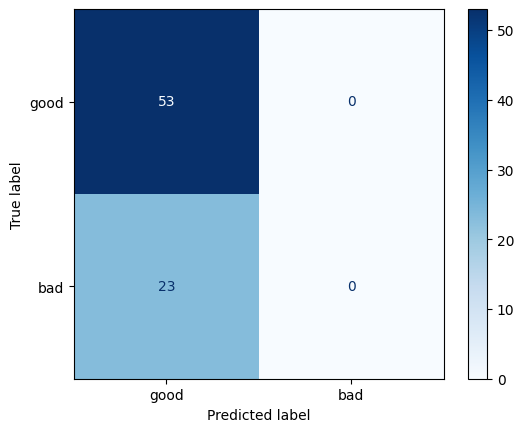

In [6]:
from sklearn.metrics import accuracy_score , f1_score ,\
                            confusion_matrix , ConfusionMatrixDisplay,\
                            roc_curve , roc_auc_score
p_test = model.predict(X_test)

p_test_bin = p_test >=0.5
print("정확도 : "+str(accuracy_score(y_test , p_test_bin ))) #p_test>=0.5  를넣어야됨.
print("f1 score  : "+str(f1_score(y_test , p_test_bin )))

plt.figure()
ConfusionMatrixDisplay(confusion_matrix= confusion_matrix(y_test , p_test_bin),
                      display_labels=['good', 'bad']).plot(cmap="Blues") #Blues
plt.show() 
#여기에서 모델을 못맞추는게 보이면 -> 모델을 고쳐줘야함. -> 이걸여러번해줘야함. 한번에 되는경우가 없음.  Conv2D를 바꿔줄수있고 strides 를바꿔줄수있고 MaxPooling을 바꿔줄수있어서
#이거하나하나 바꾸는 최적의 경로를 찾아야함. 하나하나 전부 다 손으로 해줘야함.

# 다 1 로 예측하는걸로 봐서 불균형문제 -> upsampling 으로 해봐야함. 

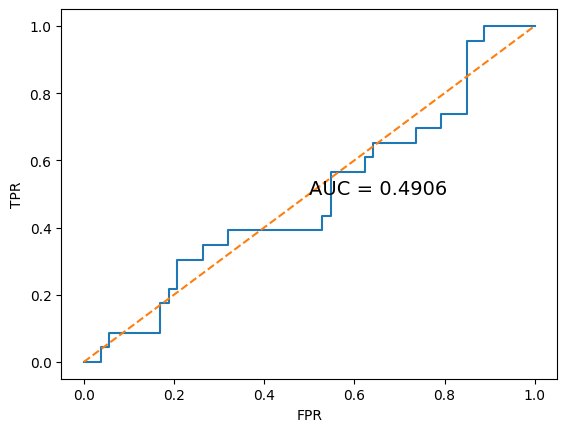

In [7]:
fpr , tpr, _ = roc_curve(y_test, p_test)
auc = roc_auc_score(y_test,p_test)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.text(0.5 ,0.5 , "AUC = {:.4f}".format(auc), fontsize=14)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
혼자서 하는데 까지 해보는게 중요함. 

기존에 실습한거 코드안보고 연습해보고

kaggle 이라는 사이트 들어가서 구경하거나 연습할수있음.